In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
import keras

from tensorflow.keras.models import load_model
from vis.utils import utils
from vis.visualization import visualize_cam, overlay

from build_model import build_model

Using TensorFlow backend.


In [3]:
def img_preprocess(img):
    img = img[40:140, :, :]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img / 255
    return img

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
keras.backend.tensorflow_backend.set_session(sess)


model = load_model('model.h5')

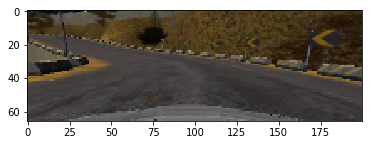

In [4]:
img = utils.load_img('./data/IMG/center_2019_02_10_21_40_03_688.jpg')
img = cv2.resize(img, (200, 66))
plt.imshow(img)

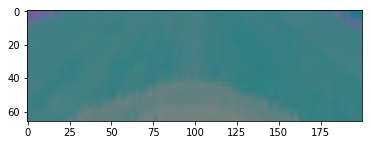

In [5]:
img_input = img_preprocess(img)
plt.imshow(img_input)
img_input = np.expand_dims(img_input, axis=0)

In [11]:
weight_from_ = model.save_weights('./model_weights.h5')
model2 = build_model()
model2.load_weights('./model_weights.h5')
pred = model2.predict(img_input)[0][0]
print('Predicted {}'.format(pred))

Predicted -0.09363944083452225


In [30]:
print(model2.summary())
print(utils.find_layer_idx(model2, 'conv2d_10'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 66, 200, 3)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
__________

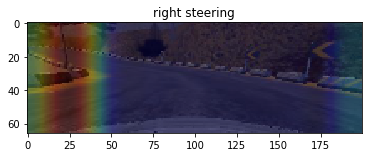

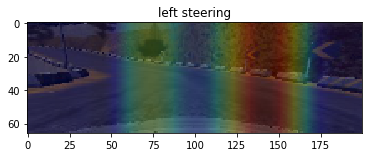

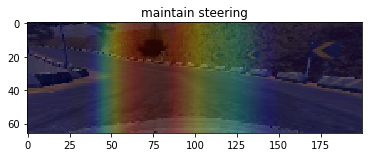

In [31]:
titles = ['right steering', 'left steering', 'maintain steering']
modifiers = [None, 'negate', 'small_values']

for i, modifier in enumerate(modifiers):
    heatmap = visualize_cam(model2, layer_idx=10, filter_indices=0, 
                                 seed_input=img_preprocess(img), grad_modifier=modifier)
    jet_heatmap = np.uint8(cm.jet(heatmap)[..., :3] * 150)
    
    plt.figure()
    plt.title(titles[i])
    # Overlay is used to alpha blend heatmap onto img.
    plt.imshow(overlay(jet_heatmap, img, alpha=0.4))